# 神经网络剖析

## 层：深度学习的基础组件

In [1]:
from keras import layers

# 有32个输出单元的密集层
layers=layers.Dense(32,input_shape=(784,))

In [2]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(32,input_shape=(784,)))
model.add(layers.Dense(32))

## 模型：层构成的网络

## 损失函数与优化器：配置学习过程的关键

# Keras简介

## Keras、TensorFlow、Theano和CNTK

## 使用Keras开发：概述

In [3]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(784,)))
model.add(layers.Dense(10,activation='softmax'))

In [4]:
input_tensor=layers.Input(shape=(784,))
x=layers.Dense(32,activation='relu')(input_tensor)
output_tensor=layers.Dense(10,activation='softmax')(x)

model=models.Model(inputs=input_tensor,outputs=output_tensor)

In [5]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.01),
             loss='mse',
             metrics=['accuracy'])

In [6]:
# model.fit(input_tensor,target_tensor,batch_size=128,epochs=10)

# 建立深度学习工作站

## Jupyter笔记本：运行深度学习实验的首选方法

## 运行Keras：两种选择

## 在云端运行深度学习任务：优点和缺点

## 深度学习的最佳GPU

# 电影评论分类：二分类问题

## IMBD数据集

In [7]:
from keras.datasets import imdb

In [8]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [9]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [10]:
train_labels[0]

1

In [11]:
max([max(sequence) for sequence in train_data])

9999

In [12]:
# word_index是一个将单词映射为整数索引的字典
word_index=imdb.get_word_index()
# 键值颠倒，将整数索引映射为单词
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
# 将评论解码。注意，索引减去了3，因为0、1、2是为“padding”（填充），“start of sequence”（序列开始）,“unknown”（未知值）分别保留的索引
decode_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decode_review

# 帮助代码
# c='abcghidefjkl'
# new_c = list(c)
# cc =' '.join(new_c)
# print('2.通过空分隔符把new_c列表里面元素进行分隔,赋值给到cc:',cc)

# test_dict=dict({'one':1,'two':2})
# print(test_dict.get(-1))
# print(test_dict.get(-1,'?')) # ''?'用与填充该索引值
# print(test_dict.get(-2,'?'))

# 测试i-3的作用
# test_decode_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
# test_decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 准备数据

In [13]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    # 创建一个形状为(len(sequences),dimension)的零矩阵
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        # 将result[i]的指定索引设为1
        results[i,sequence]=1.
    return results

# 将训练数据向量化
x_train=vectorize_sequences(train_data)
# 将测试数据向量化
x_test=vectorize_sequences(test_data)

# 帮助代码
# test=[[1,3],[0,3],[2,3],[1]]
# test_zeros=np.zeros((4,4))
# for i,sequence in enumerate(test):
#     test_zeros[i,sequence]=1.
# test_zeros

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

## 构建网路

In [16]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [17]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [19]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

## 验证你的方法

In [20]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [21]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.4993 - acc: 0.7969 - val_loss: 0.4142 - val_acc: 0.8375
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3010 - acc: 0.9065 - val_loss: 0.3048 - val_acc: 0.8871
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2236 - acc: 0.9293 - val_loss: 0.2786 - val_acc: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1756 - acc: 0.9437 - val_loss: 0.2810 - val_acc: 0.8859
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1426 - acc: 0.9575 - val_loss: 0.2806 - val_acc: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1208 - acc: 0.9618 - val_loss: 0.2939 - val_acc: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0973 - acc: 0.9715 - val_loss: 0.3534 - val_acc: 0.8706
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0793 - a

limit_output extension: Maximum message size of 10000 exceeded with 10026 characters

In [22]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

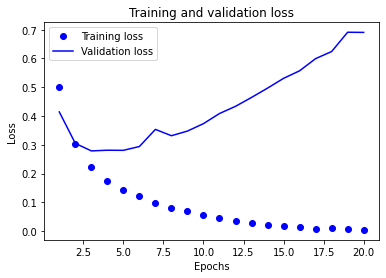

In [23]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

# 'bo'表示蓝色圆点
plt.plot(epochs,loss_values,'bo',label='Training loss')
# 'b'表示蓝色实线
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

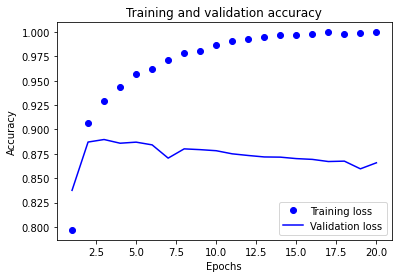

In [24]:
# 清空图像
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training loss')
plt.plot(epochs,val_acc,'b',label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [25]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4681 - acc: 0.8182
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2763 - acc: 0.9072
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2107 - acc: 0.9250
Epoch 4/4
332/782 [===========>..................] - ETA: 1s - loss: 0.2958 - acc: 0.880

limit_output extension: Maximum message size of 10000 exceeded with 10004 characters

In [26]:
results

[0.28706589341163635, 0.8855599761009216]

In [27]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.22709924],
       [0.99969196],
       [0.89478683],
       ...,
       [0.11051844],
       [0.06414317],
       [0.44116557]], dtype=float32)

In [59]:
from keras import models
from keras import layers
import numpy as np
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

def vectorize_sequences(sequences,dimension=10000):
    # 创建一个形状为(len(sequences),dimension)的零矩阵
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        # 将result[i]的指定索引设为1
        results[i,sequence]=1.
    return results

# 将训练数据向量化
x_train=vectorize_sequences(train_data)
# 将测试数据向量化
x_test=vectorize_sequences(test_data)

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

model=models.Sequential()
model.add(layers.Dense(64,activation='tanh',input_shape=(10000,)))
model.add(layers.Dense(32,activation='tanh'))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='mse',metrics=['acc'])
model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1301 - acc: 0.8152
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.0701 - acc: 0.9057
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.0532 - acc: 0.9326
Epoch 4/4
352/782 [============>.................] - ETA: 1s - loss: 0.1006 - acc: 0.868

limit_output extension: Maximum message size of 10000 exceeded with 10004 characters

In [60]:
results

[0.09721548855304718, 0.8717600107192993]